# Assignment 1: Introduction to the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Numerical stability of the binary cross-entropy loss function

We will use the binary cross-entropy loss function to train our RNN, which is defined as 
$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
where $y$ is the label and $\hat y$ is a prediction, which comes from a model (e.g. an RNN) and is usually sigmoid-activated, i.e., we have
$$
\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.
$$
The argument $z$ is called *logit*. For reasons of numerical stability it is better to let the model emit the logit $z$ (instead of the prediction $\hat y$) and incorporate the sigmoid activation into the loss function. Explain why this is the case and how we can gain numerical stability by combining the two functions $L_{\text{BCE}}(\hat y, y)$ and $\sigma(z)$ into one function $L(z, y) = L_{\text{BCE}}(\sigma(z), y)$. 

*Hint: Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ and argue why the right-hand side is numerically more stable. Finally, express $L(z,y)$ in terms of that form.*

Reason for incorporating sigmoid function with binary cross entropy is to deal with falsely classified samples which occur at the beginning of training:
+ if prediction $\hat y$ = 0, but true label is 1:
$$
-1 * \log (0) - (1-1) * \log(1-0) = \log(0) = -inf
$$
or prediction $\hat y$ = 1, but true label is 0:
$$
0 * \log(1) - (1-0) * \log(1-1) = \log(0) = -inf
$$
where -inf is unfavorable for further calculations

+ solution:
$$
L_{\text{BCE}}(\sigma(z), y) = -y \log (\frac{1}{1+e^{-z}}) - (1-y) \log(1-\frac{1}{1+e^{-z}}) \\
= -y (-1) \log(1+e^{-z}) - (1-y) \log(\frac{1+e^{-z}-1}{1+e^{-z}}) \\
= y \log(1+e^{-z}) - (1-y)[\log(e^{-z}) - \log(1+e^{-z})] \\ 
= y \log(1+e^{-z}) - (\log(e^{-z}) - y \log(e^{-z}) - \log(1+e^{-z}) + y \log(1+e^{-z})) \\
= y \log(1+e^{-z}) - \log(e^{-z}) + y \log(e^{-z}) + \log(1+e^{-z}) - y \log(1+e^{-z}) \\
= - \log(e^{-z}) + y \log(e^{-z}) + \log(1+e^{-z}) \\
$$
$$
notice: - \log(e^{-z}) = 0 - \log(e^{-z}) = \log(1) - \log(e^{-z}) = \log(\frac{1}{e^{-z}}) = \log(e^{z}) \\
$$
$$
\begin{align*}
&= \log(e^{z}) - yz + \log(1+e^{-z}) \\
&= \log(e^{z}(1+e^{-z})) - yz \\
&= \log(e^{z} + e^{z-z}) - yz \\ 
&= \log(e^{z} + 1) - yz \tag{a}
\end{align*}
$$

+ the result $\log(e^{z} + 1) - yz$ will be used for derivation 

+ in order to keep the term yz from overflowing we introduce $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ 

proof:
+ if z > 0:

$$
\log(1+e^{z}) \\
= \log((e^{-z} + 1) * e^{z}) \\
= \log(e^{-z} + 1) + log(e^{z}) \\
= \log(e^{-z} + 1) + z \\
= \log(e^{-z} + 1) + \max(0,z)
$$

+ if z < 0:

$$
\log(1+e^{-z}) = \log(1+e^{-z}) + max(0, -z) \\
= \log(1+e^{-z})
$$

Finally we have:
$$
L_{\text{BCE}}(z, y) = \log (1+e^{-|z|}) + \max(0, z) - yz
$$

Why is $\log(1+e^{-|z|}) + max(0,z)$ more stable?
+ computationally choosing the exponential z of e with z > 700 we get overflow error in $\log(1+e^z)$
+ but $e^{-z}$ < 1 with z $\in\mathbb{R}$, so 0 < $\log(1+e^{-|z|})$ < 1, so we avoid overflow

## Exercise 2: Derivative of the loss

Calculate the derivative of the binary cross-entropy loss function $L(z, y)$ with respect to the logit $z$.

$$
\begin{align*}
    L_{\text{BCE}}(z, y) = \log (1+e^{z}) - yz \tag{a} \\ 
    \frac{\partial L_{\text{BCE}}(z, y)}{\partial z} = \frac{1}{1+e^{z}} * e^{z} - y \\
    =\frac{1}{e^{-z}(e^z + 1)} - y \\
    =\frac{1}{1+e^{-z}} - y \\
    =\sigma(z) - y
\end{align*}
$$



## Exercise 3: Initializing the network
Consider the fully recurrent network
$$
s(t) = W x(t) + R a(t-1) \\
a(t) = \tanh(s(t)) \\
z(t) = V a(t) \\
\hat y(t) = \sigma(z(t))
$$
for $t \in \mathbb{N}, x(t) \in \mathbb{R}^{D}, s(t) \in \mathbb{R}^{I}, a(t) \in \mathbb{R}^{I}, z(t) \in \mathbb{R}^K, \hat y(t) \in \mathbb{R}^K$ and $W, R, V$ are real matrices of appropriate sizes and $\hat a(0) = 0$. 

*Compared to the lecture notes we choose $f(x) = \tanh(x) = (e^x - e^{-x})(e^x + e^{-x})^{-1}$ and $\varphi(x) = \sigma(x) = (1+e^{-x})^{-1}$. Further, we introduced an auxiliary variable $z(t)$ and transposed the weight matrices.*

Write a function `init` that takes a `model` and integers $D, I, K$ as arguments and stores the matrices $W, R, V$ as members `model.W`, `model.R`, `model.V`, respectively. The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01. 

In [11]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid

class Obj(object):
    pass

model = Obj()
T, D, I, K = 10, 3, 5, 1

def init(model, D, I, K):
    ########## YOUR SOLUTION HERE ##########
    model.W = np.random.uniform(-0.01,0.01,(I,D))
    model.R = np.random.uniform(-0.01,0.01,(K,I))
    model.V = np.random.uniform(-0.01,0.01,(K,I))

Obj.init = init
model.init(D, I, K)

## Exercise 4: The forward pass
Implement the forward pass for the fully recurrent network for sequence classification (many-to-one mapping). To this end, write a function `forward` that takes a `model`, a sequence of input vectors `x`, and a label `y` as arguments. The inputs will be represented as a `numpy` array of shape `(T, D)`. It should execute the behavior of the fully recurrent network and evaluate the (numerically stabilized) binary cross-entropy loss at the end of the sequence and return the resulting loss value. Store the sequence of hidden activations $(a(t))_{t=1}^T$ and the logit $z(T)$ into `model.a` and `model.z`, respectively. 

In [12]:
def forward(model, x, y):
    ########## YOUR SOLUTION HERE ##########
    T,D = x.shape
    
    model.a = np.zeros((T,I))
    model.y_hat = np.zeros((T,K))

    for t in range(T):
        s = model.W @ x[t] + model.R @ model.a[t-1]
        model.a[t] = np.tanh(s)
        z = model.V @ model.a[t]
        y_hat = sigmoid(z)
        loss = -y * z + np.log(1 + np.exp(-np.abs(z))) + np.maximum(0,z)
    
    return loss

np.random.seed(0)
Obj.forward = forward
model.forward(np.random.uniform(-1, 1, (T, D)), 1)

array([0.69316821])

## Exercise 5: The computational graph

Visualize the computational graph of the fully recurrent network unfolded in time. The graph should show the functional dependencies of the nodes $x(t), a(t), z(t), L(z(t), y(t))$ for $t \in \{1, 2, 3\}$. Use the package `networkx` in combination with `matplotlib` to draw a directed graph with labelled nodes and edges. If you need help take a look at [this guide](https://networkx.guide/visualization/basics/). Make sure to arrange the nodes in a meaningful way. 

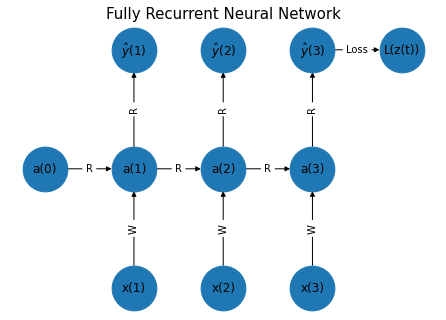

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

########## YOUR SOLUTION HERE ##########

graph = nx.DiGraph()

graph.add_node("a(0)", pos=(0,1))
graph.add_node("a(1)", pos=(1,1))
graph.add_node("a(2)", pos=(2,1))
graph.add_node("a(3)", pos=(3,1))
graph.add_edge("a(0)", "a(1)", label="R")

graph.add_node("x(1)", pos=(1,0))
graph.add_node("x(2)", pos=(2,0))
graph.add_node("x(3)", pos=(3,0))
graph.add_edge("x(1)", "a(1)",label="W")
graph.add_edge("x(2)", "a(2)",label="W")
graph.add_edge("x(3)", "a(3)",label="W")

graph.add_node("$\hat{y}$(1)", pos=(1,2))
graph.add_node("$\hat{y}$(2)", pos=(2,2))
graph.add_node("$\hat{y}$(3)", pos=(3,2))
graph.add_node("L(z(t))", pos=(4,2))

graph.add_edge("a(1)", "$\hat{y}$(1)", label="R")
graph.add_edge("a(2)", "$\hat{y}$(2)", label="R")
graph.add_edge("a(3)", "$\hat{y}$(3)", label="R")
graph.add_edge("$\hat{y}$(3)", "L(z(t))", label="Loss")

graph.add_edge("a(1)", "a(2)", label="R")
graph.add_edge("a(2)", "a(3)", label="R")

pos = nx.get_node_attributes(graph, "pos")
edge_labels = nx.get_edge_attributes(graph, "label")

nx.draw(graph, pos, with_labels=True, node_size=2000)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Fully Recurrent Neural Network", size=15)
plt.show()